# Train/Cross Validation/Test Split

- The data is divided into train Cross validation and Test.
<pre> 
The data given here is temporial data.So we have to divide the data according to time.
Divide first 60% data as Train and next 20% as Cross Validation and next 20% as Test Data
</pre>

<b>Only reviews are used in the modelling</b>

# Modelling of Amazon Fine Food Reviews

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

con = sqlite3.connect('database.sqlite')

messages = pd.read_sql_query("""
SELECT Score, Summary,Text
FROM Reviews
WHERE Score != 3 order by Time
""", con)

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

Score = messages['Score']
Score = Score.map(partition)
Text=messages['Text']
Text.head()

/home/varma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0    this witty little book makes my son laugh at l...
1    I can remember seeing the show when it aired o...
2    Beetlejuice is a well written movie ..... ever...
3    A twist of rumplestiskin captured on film, sta...
4    A twist of rumplestiskin captured on film, sta...
Name: Text, dtype: object

# Train/Test Spliit

In [10]:
X_train,y_train=Text[:315488],Score[:315488]
X_cv,y_cv=Text[315488:420651],Score[315488:420651]
X_test,y_test=Text[420651:],Score[420651:]
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)
print("Cross Validation Shape",X_cv.shape)

Train Shape (315488,)
Test Shape (105163,)
Cross Validation Shape (105163,)


# Converting into lowercase for train data

In [12]:
text_lst=X_train
text_lst=[item.encode('utf-8') for item in text_lst]
cX_train=[str(item).lower() for item in text_lst]
print (cX_train[0:2])

['b"this witty little book makes my son laugh at loud. i recite it in the car as we\'re driving along and he always can sing the refrain. he\'s learned about whales, india, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will still be able to recite from memory when he is  in college"', 'b"i can remember seeing the show when it aired on television years ago, when i was a child.  my sister later bought me the lp (which i have to this day,  i\'m thirty something).i used this series of books &amp; songs when i did my  student teaching for preschoolers &amp; turned the whole school on to it.  i am now purchasing it on cd, along with the books for my children 5 &amp;  2.  the tradition lives on!"']


In [36]:
text_lst=X_cv
text_lst=[item.encode('utf-8') for item in text_lst]
cX_cv=[str(item).lower() for item in text_lst]
print (cX_cv[0:2])

['b\'i\\\'ve ordered this coffee several times & it has been excellent every time.  it\\\'s not over-roasted/burnt tasting & the flavor is very complex.  the beans are oily, black & i found no quakers (underdeveloped coffee beans that make coffee taste awful - they stick out because they do not roast/darken properly).  that\\\'s a good test of coffee beans:  empty the bag on a cookie sheet & see how many quakers you find.  a few is "acceptable" but more than 10 is pretty bad in my opinion.  if you\\\'ve always been disappointed in dark roast coffee, you may want to give this a try but if you just don\\\'t like dark roast; you will probably not like this one.<br /><br />i use the "pour over" method to brew coffee every day because at this time, there is only one non-commercial drip coffeemaker that gets water to the ideal brewing temperature of 192f to 204 f.  i use cold, filtered water, a melitta natural brown filter, manual drip coffee filter & brew directly into my stainless carafe. 

# Converting into lowercase for Test data

In [15]:
text_test=X_test
text_test=[item.encode('utf-8') for item in text_test]
cX_test=[str(item).lower() for item in text_test]
print( cX_test[0:2])

['b"i was a little hesitant when i read it had a herbal taste , i like a conventional tasting coffee. it just arrived and i immediately brewed a pot. i definitely wasn\'t disappointed, i like this much more than the usual starbuck\'s french roast"', "b'buyer beware, the worst flavored hot cocoa i have ever tasted. never again would i waste my $ for this product, i tried different machine sizes and options, the rest goes in the garbage. what a rip off with two packages.'"]


# Removing Html tags from train data

In [ ]:
import re

for i in range(len(cX_train)):
    cX_train[i]=re.sub(r'<.*?>', '', cX_train[i])
print (cX_train[0:2])

In [38]:
import re

for i in range(len(cX_cv)):
    cX_cv[i]=re.sub(r'<.*?>', '', cX_cv[i])
print (cX_cv[0:2])

['b\'i\\\'ve ordered this coffee several times & it has been excellent every time.  it\\\'s not over-roasted/burnt tasting & the flavor is very complex.  the beans are oily, black & i found no quakers (underdeveloped coffee beans that make coffee taste awful - they stick out because they do not roast/darken properly).  that\\\'s a good test of coffee beans:  empty the bag on a cookie sheet & see how many quakers you find.  a few is "acceptable" but more than 10 is pretty bad in my opinion.  if you\\\'ve always been disappointed in dark roast coffee, you may want to give this a try but if you just don\\\'t like dark roast; you will probably not like this one.i use the "pour over" method to brew coffee every day because at this time, there is only one non-commercial drip coffeemaker that gets water to the ideal brewing temperature of 192f to 204 f.  i use cold, filtered water, a melitta natural brown filter, manual drip coffee filter & brew directly into my stainless carafe.  i heat the 

# Removing Html Tags from test data

In [17]:
for i in range(len(cX_test)):
    cX_test[i]=re.sub(r'<.*?>', '', cX_test[i])
print (cX_test[0:2])

['b"i was a little hesitant when i read it had a herbal taste , i like a conventional tasting coffee. it just arrived and i immediately brewed a pot. i definitely wasn\'t disappointed, i like this much more than the usual starbuck\'s french roast"', "b'buyer beware, the worst flavored hot cocoa i have ever tasted. never again would i waste my $ for this product, i tried different machine sizes and options, the rest goes in the garbage. what a rip off with two packages.'"]


# Removing Special Characters

In [18]:
for i in range(len(cX_train)):
    cX_train[i]=re.sub(r'[^a-zA-Z ]+', ' ', cX_train[i])
print (cX_train[0:2])

['b this witty little book makes my son laugh at loud  i recite it in the car as we re driving along and he always can sing the refrain  he s learned about whales  india  drooping roses   i love all the new words this book  introduces and the silliness of it all   this is a classic book i am  willing to bet my son will still be able to recite from memory when he is  in college ', 'b i can remember seeing the show when it aired on television years ago  when i was a child   my sister later bought me the lp  which i have to this day   i m thirty something i used this series of books  amp  songs when i did my  student teaching for preschoolers  amp  turned the whole school on to it   i am now purchasing it on cd  along with the books for my children    amp      the tradition lives on ']


In [39]:
for i in range(len(cX_cv)):
    cX_cv[i]=re.sub(r'[^a-zA-Z ]+', ' ', cX_cv[i])
print (cX_cv[0:2])

['b i ve ordered this coffee several times   it has been excellent every time   it s not over roasted burnt tasting   the flavor is very complex   the beans are oily  black   i found no quakers  underdeveloped coffee beans that make coffee taste awful   they stick out because they do not roast darken properly   that s a good test of coffee beans   empty the bag on a cookie sheet   see how many quakers you find   a few is  acceptable  but more than   is pretty bad in my opinion   if you ve always been disappointed in dark roast coffee  you may want to give this a try but if you just don t like dark roast  you will probably not like this one i use the  pour over  method to brew coffee every day because at this time  there is only one non commercial drip coffeemaker that gets water to the ideal brewing temperature of  f to   f   i use cold  filtered water  a melitta natural brown filter  manual drip coffee filter   brew directly into my stainless carafe   i heat the water to boiling  pour

In [19]:
for i in range(len(cX_test)):
    cX_test[i]=re.sub(r'[^a-zA-Z ]+', ' ', cX_test[i])
print (cX_test[0:2])

['b i was a little hesitant when i read it had a herbal taste   i like a conventional tasting coffee  it just arrived and i immediately brewed a pot  i definitely wasn t disappointed  i like this much more than the usual starbuck s french roast ', 'b buyer beware  the worst flavored hot cocoa i have ever tasted  never again would i waste my   for this product  i tried different machine sizes and options  the rest goes in the garbage  what a rip off with two packages ']


# Removing Stopwords

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopword=set(stopwords.words('english'))
for i in range(len(cX_train)):
    text_stoprm=[]
    text_tokens=[]
    text_tokens=cX_train[i].split()
    for r in text_tokens:
        if not r in stopword:
            text_stoprm.append(r)
    cX_train[i]=' '.join(text_stoprm)
    
print (cX_train[0:2])

['b witty little book makes son laugh loud recite car driving along always sing refrain learned whales india drooping roses love new words book introduces silliness classic book willing bet son still able recite memory college', 'b remember seeing show aired television years ago child sister later bought lp day thirty something used series books amp songs student teaching preschoolers amp turned whole school purchasing cd along books children amp tradition lives']


In [40]:
for i in range(len(cX_cv)):
    text_stoprm=[]
    text_tokens=[]
    text_tokens=cX_cv[i].split()
    for r in text_tokens:
        if not r in stopword:
            text_stoprm.append(r)
    cX_cv[i]=' '.join(text_stoprm)
    
print (cX_cv[0:2])

['b ordered coffee several times excellent every time roasted burnt tasting flavor complex beans oily black found quakers underdeveloped coffee beans make coffee taste awful stick roast darken properly good test coffee beans empty bag cookie sheet see many quakers find acceptable pretty bad opinion always disappointed dark roast coffee may want give try like dark roast probably like one use pour method brew coffee every day time one non commercial drip coffeemaker gets water ideal brewing temperature f f use cold filtered water melitta natural brown filter manual drip coffee filter brew directly stainless carafe heat water boiling pour tablespoons grounds saturate plump beans wait minute flood grounds rest water lot crema beautiful reddish brown foam develops top beans smells tastes wonderful brew directly carafe using coffee cone pour method rsvp manual drip coffee filter cone carafes thermosi use grinder bodum bistro electric burr coffee grinder blacki use water kettle heat water ost

In [23]:
for i in range(len(cX_test)):
    text_stoprm=[]
    text_tokens=[]
    text_tokens=cX_test[i].split()
    for r in text_tokens:
        if not r in stopword:
            text_stoprm.append(r)
    cX_test[i]=' '.join(text_stoprm)
    
print( cX_test[0:2])

['b little hesitant read herbal taste like conventional tasting coffee arrived immediately brewed pot definitely disappointed like much usual starbuck french roast', 'b buyer beware worst flavored hot cocoa ever tasted never would waste product tried different machine sizes options rest goes garbage rip two packages']


# Stemming Data

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer =SnowballStemmer('english')

for i in range(len(cX_train)):
    text_stem=[]
    text_tokens=[]
    text_tokens=cX_train[i].split()
    for r in text_tokens:
        text_stem.append(str(stemmer.stem(r)))
    cX_train[i]=' '.join(text_stem)
    


In [41]:

for i in range(len(cX_cv)):
    text_stem=[]
    text_tokens=[]
    text_tokens=cX_cv[i].split()
    for r in text_tokens:
        text_stem.append(str(stemmer.stem(r)))
    cX_cv[i]=' '.join(text_stem)
    

In [26]:
from nltk.stem.snowball import SnowballStemmer
stemmer =SnowballStemmer('english')

for i in range(len(cX_test)):
    text_stem=[]
    text_tokens=[]
    text_tokens=cX_test[i].split()
    for r in text_tokens:
        text_stem.append(str(stemmer.stem(r)))
    cX_test[i]=' '.join(text_stem)
    


# Converting the Bag of Words

In [27]:
vec=CountVectorizer()
X_train_bow=vec.fit_transform(cX_train)

In [42]:
X_train_bow.shape

(315488, 65586)

In [44]:
X_cv_bow=vec.transform(cX_cv)

In [45]:
X_cv_bow.shape

(105163, 65586)

In [29]:
X_test_bow=vec.transform(cX_test)

In [43]:
X_test_bow.shape

(105163, 65586)

# Navie Bayes Classifier

Here I used Multinomial Navie Bayes Classifer

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
maxval=0
bestalpha=0
for i in alpha:
    clf=MultinomialNB(alpha=i)
    clf.fit(X_train_bow,y_train)
    cvpredicted=clf.predict(X_cv_bow)
    score=accuracy_score(y_cv,cvpredicted)
    print('for alpha',i,'accuracy score is',score)
    if(maxval<score):
        maxval=score
        bestalpha=i
print('-'*100)
print('the best alpha is ',bestalpha,'and score on CV is',maxval)

print('-'*100)

#for test data
clf=MultinomialNB(alpha=bestalpha)
clf.fit(X_train_bow,y_train)

trainpredicted=clf.predict(X_train_bow)
score=accuracy_score(y_train,trainpredicted)
print('train accuracy is',score)

cvpredicted=clf.predict(X_cv_bow)
score=accuracy_score(y_cv,cvpredicted)
print('cv accuracy',score)

testpredicted=clf.predict(X_test_bow)
score=accuracy_score(y_test,testpredicted)
print('test accuracy',score)


for alpha 1e-05 accuracy score is 0.8856156633036334
for alpha 0.0001 accuracy score is 0.886528531898101
for alpha 0.001 accuracy score is 0.8882496695605869
for alpha 0.01 accuracy score is 0.8900944248452403
for alpha 0.1 accuracy score is 0.8917775263162899
for alpha 1 accuracy score is 0.8940692068503181
for alpha 10 accuracy score is 0.8677957076157964
for alpha 100 accuracy score is 0.8221712959881327
for alpha 1000 accuracy score is 0.822237859323146
----------------------------------------------------------------------------------------------------
the best alpha is  1 and score on CV is 0.8940692068503181
----------------------------------------------------------------------------------------------------
train accuracy is 0.915965108023126
cv accuracy 0.8940692068503181
test accuracy 0.8933465192130312


In [94]:
from sklearn.metrics import classification_report

classifiaction_rep=classification_report(y_test,testpredicted)

print(classifiaction_rep)

             precision    recall  f1-score   support

   negative       0.70      0.65      0.67     17840
   positive       0.93      0.94      0.94     87323

avg / total       0.89      0.89      0.89    105163



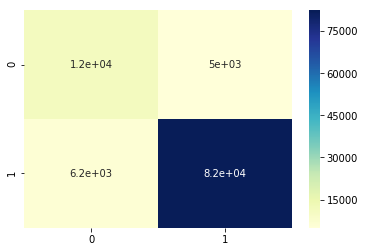

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix=confusion_matrix(testpredicted,y_test)
sns.heatmap(matrix,annot=True,cmap='YlGnBu')

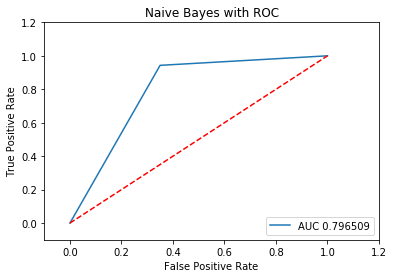

In [96]:
from sklearn import metrics

def formatt(x):
    if x == 'negative':
        return 0
    return 1

vfunc=np.vectorize(formatt)

fpr, tpr, thresholds = metrics.roc_curve(y_test.map(formatt),vfunc(testpredicted))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC %f'% roc_auc)

plt.title('Naive Bayes with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
maxval=0
bestalpha=0
for i in alpha:
    clf=LogisticRegression(C=i)
    clf.fit(X_train_bow,y_train)
    cvpredicted=clf.predict(X_cv_bow)
    score=accuracy_score(y_cv,cvpredicted)
    print('for alpha',i,'accuracy score is',score)
    if(maxval<score):
        maxval=score
        bestalpha=i
print('-'*100)
print('the best alpha is ',bestalpha,'and score on CV is',maxval)

print('-'*100)

#for test data
clf=LogisticRegression(C=bestalpha)
clf.fit(X_train_bow,y_train)

trainpredicted=clf.predict(X_train_bow)
score=accuracy_score(y_train,trainpredicted)
print('train accuracy is',score)

cvpredicted=clf.predict(X_cv_bow)
score=accuracy_score(y_cv,cvpredicted)
print('cv accuracy',score)

testpredicted=clf.predict(X_test_bow)
score=accuracy_score(y_test,testpredicted)
print('test accuracy',score)


for alpha 1e-05 accuracy score is 0.822237859323146
for alpha 0.0001 accuracy score is 0.8316898528950296
for alpha 0.001 accuracy score is 0.8803286326940083
for alpha 0.01 accuracy score is 0.9060125709612696
for alpha 0.1 accuracy score is 0.9142759335507735
for alpha 1 accuracy score is 0.9136578454399361
for alpha 10 accuracy score is 0.9113756739537671
for alpha 100 accuracy score is 0.9111569658530091
for alpha 1000 accuracy score is 0.9112045110923044
----------------------------------------------------------------------------------------------------
the best alpha is  0.1 and score on CV is 0.9142759335507735
----------------------------------------------------------------------------------------------------
train accuracy is 0.9408662136119282
cv accuracy 0.9142759335507735
test accuracy 0.913134847807689


In [98]:
classifiaction_rep=classification_report(y_test,testpredicted)

print (classifiaction_rep)

             precision    recall  f1-score   support

   negative       0.81      0.63      0.71     17840
   positive       0.93      0.97      0.95     87323

avg / total       0.91      0.91      0.91    105163



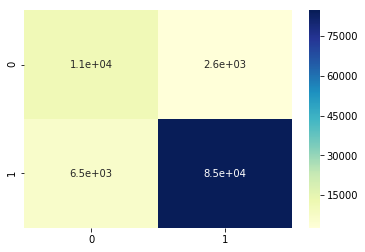

In [101]:
matrix=confusion_matrix(testpredicted,y_test)
sns.heatmap(matrix,annot=True,cmap='YlGnBu')

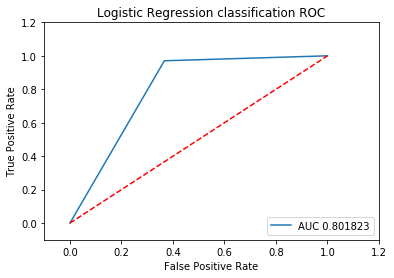

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.map(formatt),vfunc(testpredicted))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC %f'% roc_auc)

plt.title('Logistic Regression classification ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Linear SVM

In [102]:
from sklearn.linear_model import SGDClassifier

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
maxval=0
bestalpha=0
for i in alpha:
    clf=SGDClassifier(loss='hinge',alpha=i,penalty='l2',n_jobs=-1)
    clf.fit(X_train_bow,y_train)
    cvpredicted=clf.predict(X_cv_bow)
    score=accuracy_score(y_cv,cvpredicted)
    print('for alpha',i,'accuracy score is',score)
    if(maxval<score):
        maxval=score
        bestalpha=i
print('-'*100)

print('the best alpha is ',bestalpha,'and score on CV is',maxval)

print('-'*100)

#for test data
clf=SGDClassifier(loss='hinge',alpha=bestalpha,penalty='l2',n_jobs=-1)
clf.fit(X_train_bow,y_train)

trainpredicted=clf.predict(X_train_bow)
score=accuracy_score(y_train,trainpredicted)
print('train accuracy is',score)

cvpredicted=clf.predict(X_cv_bow)
score=accuracy_score(y_cv,cvpredicted)
print('cv accuracy',score)

testpredicted=clf.predict(X_test_bow)
score=accuracy_score(y_test,testpredicted)
print('test accuracy',score)


/home/varma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


for alpha 1e-05 accuracy score is 0.9019331894297424
for alpha 0.0001 accuracy score is 0.9120317982560406
for alpha 0.001 accuracy score is 0.9033975828000342
for alpha 0.01 accuracy score is 0.8730447020339853
for alpha 0.1 accuracy score is 0.8236832345977197
for alpha 1 accuracy score is 0.822237859323146
for alpha 10 accuracy score is 0.822237859323146
for alpha 100 accuracy score is 0.822237859323146
for alpha 1000 accuracy score is 0.822237859323146
----------------------------------------------------------------------------------------------------
the best alpha is  0.0001 and score on CV is 0.9120317982560406
----------------------------------------------------------------------------------------------------
train accuracy is 0.9371354853433411
cv accuracy 0.9117179996766924
test accuracy 0.9115848730066658


In [103]:
classifiaction_rep=classification_report(y_test,testpredicted)

print(classifiaction_rep)

             precision    recall  f1-score   support

   negative       0.81      0.63      0.71     17840
   positive       0.93      0.97      0.95     87323

avg / total       0.91      0.91      0.91    105163



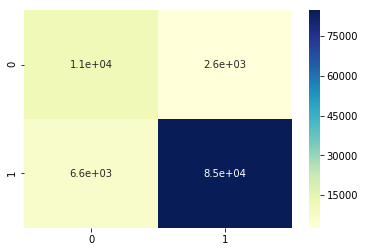

In [104]:
matrix=confusion_matrix(testpredicted,y_test)

sns.heatmap(matrix,annot=True,cmap='YlGnBu')

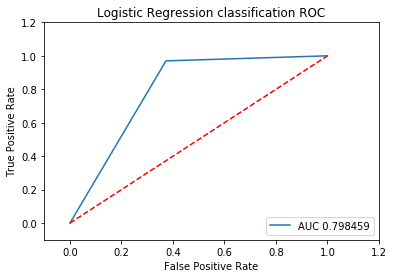

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.map(formatt),vfunc(testpredicted))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC %f'% roc_auc)

plt.title('Logistic Regression classification ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier

alpha=[10,50,100,500,1000,2000]

maxval=0
bestalpha=0
for i in alpha:
    clf=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    clf.fit(X_train_bow,y_train)
    cvpredicted=clf.predict(X_cv_bow)
    score=accuracy_score(y_cv,cvpredicted)
    print('for alpha',i,'accuracy score is',score)
    if(maxval<score):
        maxval=score
        bestalpha=i
print('-'*100)
print('the best alpha is ',bestalpha,'and score on CV is',maxval)

print('-'*100)

#for test data
clf=RandomForestClassifier(n_estimators=bestalpha,n_jobs=-1)
clf.fit(X_train_bow,y_train)

trainpredicted=clf.predict(X_train_bow)
score=accuracy_score(y_train,trainpredicted)
print('train accuracy is',score)

cvpredicted=clf.predict(X_cv_bow)
score=accuracy_score(y_cv,cvpredicted)
print('cv accuracy',score)

testpredicted=clf.predict(X_test_bow)
score=accuracy_score(y_test,testpredicted)
print('test accuracy',score)


for alpha 10 accuracy score is 0.8673963276057168
for alpha 50 accuracy score is 0.8615958084117037
for alpha 100 accuracy score is 0.8606449036257999
for alpha 500 accuracy score is 0.8572977187794186
for alpha 1000 accuracy score is 0.8566225763814269
for alpha 2000 accuracy score is 0.8570409744872246
----------------------------------------------------------------------------------------------------
the best alpha is  10 and score on CV is 0.8673963276057168
----------------------------------------------------------------------------------------------------
train accuracy is 0.9980221117760422
cv accuracy 0.8685469223966604
test accuracy 0.8711333834143187


- For randomforest the model is overfit to the data